## CS867: Computer Vision


> Image Classification Using CNN 



## Author <a name="data"></a>

<b>Name</b>: Waqas Rauf Khattak <br>
<b>CMS_ID</b>: 318256 <br>
<b>School</b>: School of Electrical Engineering anf Computer Science (SEECS) <br>
<b>University</b>: National University of Science and Technology (NUST) <br>
<b>Task</b>: : 315 Birds Species Classification using VGG19

In [ ]:
# necessary imports

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.optimizers import gradient_descent_v2 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from google.colab import drive
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions
from numpy import expand_dims
from skimage.transform import resize
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Mounting google drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/CV Assignments/Assignment 02/Assignment_02_Dataset/'
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/CV Assignments/Assignment 02/Assignment_02_Dataset
315BirdsSpecies  chest_xray  chest_xray.zip  test  train


In [ ]:
%cd '/content/gdrive/My Drive/CV Assignments/Assignment 02/Assignment_02_Dataset/315BirdsSpecies'
!ls

/content/gdrive/My Drive/CV Assignments/Assignment 02/Assignment_02_Dataset/315BirdsSpecies
315_Birds_Species.zip  class_dict.csv  test  train  valid


In [ ]:
!unzip -q 315_Birds_Species.zip

In [ ]:
IMAGE_SIZE = [150, 150]

train_path = 'train/'
test_path = 'test/'
valid_path = 'valid/'

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False


vgg.get_layer('block5_conv4').trainable = True
vgg.get_layer('block5_conv3').trainable = True
vgg.get_layer('block5_conv2').trainable = True
  
# useful for getting number of classes
folders = glob('train/*')
  

# our layers - you can add more if you want
layer1 = Flatten()(vgg.output)
layer2 = Dense(64, activation='relu')(layer1)
prediction = Dense(len(folders), activation='softmax')(layer2)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)


In [ ]:
# getting number of classes

print(folders)

['train/CHARA DE COLLAR', 'train/CEDAR WAXWING', 'train/CERULEAN WARBLER', 'train/AFRICAN CROWNED CRANE', 'train/AFRICAN FIREFINCH', 'train/ALBATROSS', 'train/ALEXANDRINE PARAKEET', 'train/AMERICAN AVOCET', 'train/AMERICAN BITTERN', 'train/AMERICAN COOT', 'train/AMERICAN GOLDFINCH', 'train/AMERICAN KESTREL', 'train/AMERICAN PIPIT', 'train/AMERICAN REDSTART', 'train/ANHINGA', 'train/ANNAS HUMMINGBIRD', 'train/ANTBIRD', 'train/ARARIPE MANAKIN', 'train/ASIAN CRESTED IBIS', 'train/BALD EAGLE', 'train/BALD IBIS', 'train/BALI STARLING', 'train/BALTIMORE ORIOLE', 'train/BANANAQUIT', 'train/BANDED BROADBILL', 'train/BANDED PITA', 'train/BAR-TAILED GODWIT', 'train/BARN OWL', 'train/BARN SWALLOW', 'train/BARRED PUFFBIRD', 'train/BAY-BREASTED WARBLER', 'train/BEARDED BARBET', 'train/BEARDED BELLBIRD', 'train/BEARDED REEDLING', 'train/BELTED KINGFISHER', 'train/BIRD OF PARADISE', 'train/BLACK & YELLOW bROADBILL', 'train/BLACK BAZA', 'train/BLACK FRANCOLIN', 'train/BLACK SKIMMER', 'train/BLACK SWAN

In [ ]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)

# view the structure of the model
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer= sgd,
  metrics=['accuracy']
)


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (150, 150),
                                                 batch_size = 64,
                                                 shuffle = True,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (150, 150),
                                            batch_size = 64,
                                            class_mode = 'categorical')

valid_set = train_datagen.flow_from_directory(valid_path,
                                              target_size=(150,150),
                                              batch_size=64,
                                              class_mode='categorical')
                                              


Found 37134 images belonging to 254 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


In [ ]:
r = model.fit_generator(generator=training_set,
                    validation_data=test_set,
                    epochs = 10,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set))

In [ ]:
# save the model's trained weights
model.save_weights('vgg19_trained_wts.h5')
!cp "/content/vgg19_trained_wts.h5" "/content/gdrive/My Drive/"

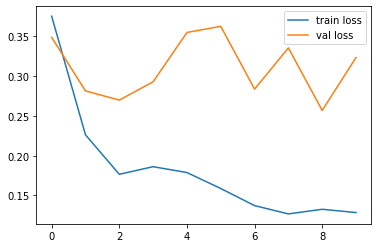

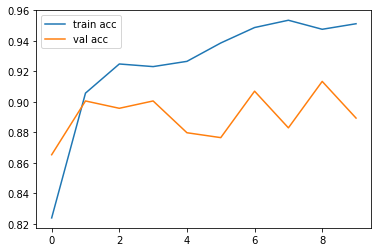

<Figure size 432x288 with 0 Axes>

In [ ]:
#LEARNING CURVE

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Evaluating Model

score = model.evaluate_generator(test_set)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test Loss =  0.3233916461467743
Test Accuracy =  0.8894230723381042


In [ ]:
# Making prediction 

pred_datagen = ImageDataGenerator(rescale = 1./255)
prediction_set = pred_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (150, 150),
                                            batch_size = 64,
                                            shuffle = False,
                                            class_mode = 'categorical')

pred_original_labels = prediction_set.classes

pred_label = model.predict_generator(prediction_set)


Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Plotting the confusion matrix

y_pred = np.argmax(pred_label, axis=1)
print('Confusion Matrix')
print(confusion_matrix(prediction_set.classes, y_pred))

In [ ]:
# Plotting the confusion matrix

y_pred = np.argmax(pred_label, axis=1)
class_labels = list(test_set.class_indices.keys()) 
report = metrics.classification_report(pred_original_labels, y_pred, target_names=class_labels)
print(report) 

print('Confusion Matrix')
CM = confusion_matrix(test_set.classes, y_pred)
print(CM)

In [ ]:
labels = ['Normal','Pneumonia'] # default sorting of classes is aplanumeric
sns.heatmap(CM, xticklabels=labels, yticklabels=labels,
            annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
# separate the classifier layer names in a list
classifier_layer_names = ['block5_pool', 'flatten', 'fc1', 'fc2', 
                          'predictions']

In [ ]:
# get the last conv layer
last_conv_layer = model.get_layer('block5_conv3')

# new model that outputs last conv layer's feature map
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [ ]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [ ]:
# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer

with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

In [ ]:
# This is the gradient of the top predicted class with regard to
# the output feature map of the last conv layer
grads = tape.gradient(top_class_channel, last_conv_layer_output)

# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the top predicted class
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(last_conv_layer_output, axis=-1)

# For visualization purpose, we will also normalize the heatmap between 0 & 1
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

In [ ]:
# print top class prediction
print(decode_predictions(model.predict(img), top=1)[0])

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
classes = ['Bacterial Pneumonia', 'NORMAL', 'Viral Pneumonia']
images = test_set.next()
org_label = test_set.classes
for i in range(30,40):
    plt.imshow(images[0][i])
    plt.show()
    print("Original Label : ",classes[org_label[i]])
    print("Model Predicted Label : ",classes[y_pred[i]])